# Principal Components Analysis

__Principal component analysis (PCA)__ refers to the process by which principal components are computed, and the subsequent use of these components in understanding the data. PCA is unsupervised approach. PCA finds a low-dimensional representation of the data that capture as much of the information as possible (contains as much as possible of the variation).

### PCA: details

Principal components are a sequence of projections of the data, mutually uncorrelated and ordered by variance.

$X_{1}, X_{2}, \dotsc, X_{p} \in \mathbb{R}^{n}$, where each of yhe variable has been centered to have mean zero.

$Z_{1}, Z_{2}, \dotsc, Z_{k} \in \mathbb{R}^n, k \leq p$

$\phi_{1}, \phi_{2}, \dotsc, \phi_{k} \dots $ are principal component directions.

The first principal component of a set of features $X_{1}, \dotsc, X_{p}$ is normalized linear combination of the features:

$$Z_{1}=\phi_{11}X_{1}+\phi_{21}X_{2}+ \dotsb +\phi_{p1}X_{p}$$

The first principal component directions $\phi_{1} = (\phi_{11},\phi_{21},\dotsc,\phi_{p1})^T$

Elements of the principal component $Z_{1}$:
$$z_{11}=(\phi_{1} \cdot X_{1})=\phi_{1}^{T}X_{1}=\displaystyle\sum_{j=1}^{p} \phi_{j1}x_{1j}$$
$$ \dotsb $$
    $$z_{i1}=(\phi_{1} \cdot X_{i})=\phi_{1}^{T}X_{i}=\displaystyle\sum_{j=1}^{p} \phi_{j1}x_{ij}, \; i=1,...,n$$

Vectors $\phi_{1}, \phi_{2}, \dotsc, \phi_{k} \dots $ are orthonormal $\iff$

$$\| \phi_{i}\|^2=\displaystyle\sum_{j=1}^{p} \phi_{ji}^2=1, i=1,...,k$$

$$ (\phi_{i} \cdot \phi_{j})=0, \text{when } i \neq j$$

The k-th principal component of a set of features $X_{1}, \dotsc, X_{p}$ is normalized linear combination of the features:

$$Z_{k}=\phi_{1k}X_{1}+\phi_{2k}X_{2}+ \dotsb +\phi_{pk}X_{p}, \; k=1,2,...,p$$

Elements of the principal component $Z_{k}$:
$$z_{ik}=(\phi_{k} \cdot X_{i})=\phi_{k}^{T}X_{i}=\displaystyle\sum_{j=1}^{p} \phi_{jk}x_{ij}, \; i=1,...,n$$

On a technical note, the principal component directions $\phi_{1}, \phi_{2}, \dotsc, \phi_{k} \dots $ are the _ordered sequence of eigenvectors_ of the matrix $\mathbf{X^{T}X}$, and _the variance of the components are eigenvalues_. $\mathbf{X}=(X_{1}, ..., X_{p})$  is  $n \times p$ data set.

> * PCs are weighted linear combunations of the orginal variables.
> * Original variables should be scaled (mean $\mu=0$, standart deviation $\sigma^2 = 1$).
> * PCs are uncorrelated.
> * PCA is intended to use with numerical variables.
> * Not robust to outliers.
> * Nonlinear information might be lost because PCA produces linear transformations and captures linear relationships.

### PCA: example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
%reload_ext version_information
%version_information pandas, matplotlib, seaborn, numpy, sklearn

Software versions
Python 3.7.5 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.13.0
OS Windows 10 10.0.18362 SP0
pandas 0.25.3
matplotlib 3.1.1
seaborn 0.9.0
numpy 1.18.1
sklearn 0.22.1
Fri Apr 17 17:23:38 2020 W. Europe Daylight Time

Violent Crime Rates by US State (data set `USArrests` from base R package)

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

A data frame with 50 observations on 4 variables.

|Variable|Description|
|----|----|
|__Murder__	|numeric	Murder arrests (per 100,000)|
|__Assault__|numeric	Assault arrests (per 100,000)|
|__UrbanPop__|numeric	Percent urban population|
|__Rape__|numeric	Rape arrests (per 100,000)|


In [3]:
arrests = pd.read_csv('../data/USArrests.csv')
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [4]:
arrests.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [5]:
arrests.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [6]:
arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


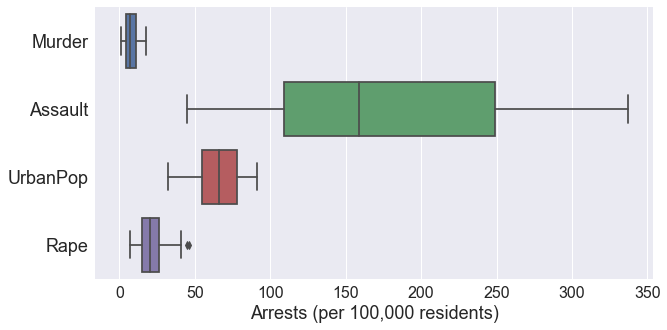

In [7]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn')
sns.boxplot(data=arrests, orient='h')
plt.xlabel('Arrests (per 100,000 residents)', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=16)
plt.show()
plt.close()

In [8]:
# create a PCA object
pca = PCA()

In [9]:
# consider only two variables
# find PCs for the reduced data set
arrests_norm = StandardScaler().fit_transform(arrests[['Assault','Murder']])
pc = pca.fit_transform(arrests_norm)

PC1 = pc[:, 0]
PC2 = pc[:, 1]

In [10]:
#Principal axes in feature space, representing the directions of maximum variance in the data.
# shape (n_components, n_features)

pd.DataFrame(pca.components_, 
             index = ['PC'+str(i+1)+' direction' for i in range(pca.n_components_)], 
             columns = ['coord_'+str(s+1) for s in range(pca.n_components_)])

,coord_1,coord_2
PC1 direction,0.707107,0.707107
PC2 direction,-0.707107,0.707107


> The principal component directions are directions in feature space along which the original data are highly variable. These directions also define lines and subspaces that are as close as possible to the data cloud.

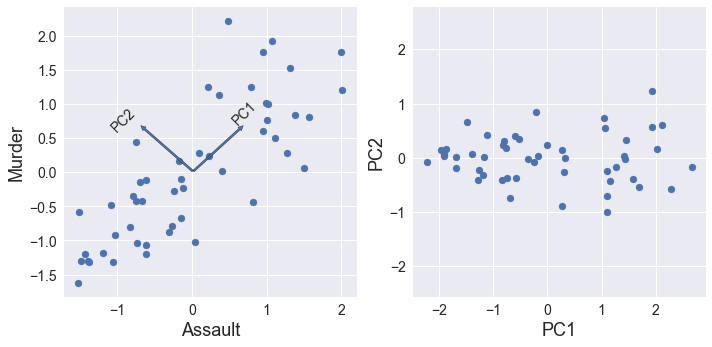

In [11]:
plt.style.use('seaborn')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# scaled data
# PC1, PC2 components direction

ax[0].scatter(x=arrests_norm[:,0], y=arrests_norm[:,1])

ax[0].annotate("", xy=(pca.components_[0, 0], pca.components_[0, 1]), xytext=(0, 0),
            arrowprops=dict(arrowstyle="simple"))

ax[0].annotate("", xy=(pca.components_[1, 0], pca.components_[1, 1]), xytext=(0.03, 0),
            arrowprops=dict(arrowstyle="simple"))

ax[0].text(pca.components_[0, 0]-0.2, pca.components_[0, 1], 'PC1', rotation=45, fontsize=14)
ax[0].text(pca.components_[1, 0]-0.4, pca.components_[1, 1]-0.1, 'PC2', rotation=45, fontsize=14)

ax[0].set_xlabel('Assault', fontsize=18)
ax[0].set_ylabel('Murder', fontsize=18)
ax[0].tick_params(labelsize=14)


# data in principal component coordinates
ax[1].scatter(x=PC1, y=PC2)
ax[1].set_xlabel('PC1', fontsize=18)
ax[1].set_ylabel('PC2', fontsize=18)
ax[1].tick_params(labelsize=14)

plt.axis('equal')
plt.tight_layout()
plt.savefig('../figs/principal_components.pdf')
plt.show()
plt.close()

In [12]:
# principal components are uncorrelated
np.correlate(PC1, PC2)

array([3.33066907e-16])

__The total variance__ is the sum of variances of all individual principal components.

__The proportion of variance explained__ by a principal component is the ratio between the variance of that principal component and the __total variance__.

In [13]:
pd.DataFrame({'Proportion of variance': pca.explained_variance_ratio_,
              'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)},
              index=[ 'PC'+str(x+1) for x in range(pca.n_components_)]).T

,PC1,PC2
Proportion of variance,0.900937,0.099063
Cumulative proportion,0.900937,1.000000


In [14]:
# PCs for the full data set

pc_all = pca.fit_transform(StandardScaler().fit_transform(arrests))

pd.DataFrame(pca.components_, 
             index = ['PC'+str(i+1)+' direction' for i in range(pca.n_components_)], 
             columns = ['coord_'+str(s+1) for s in range(pca.n_components_)])

,coord_1,coord_2,coord_3,coord_4
PC1 direction,0.535899,0.583184,0.278191,0.543432
PC2 direction,0.418181,0.187986,-0.872806,-0.167319
PC3 direction,-0.341233,-0.268148,-0.378016,0.817778
PC4 direction,0.649228,-0.743407,0.133878,0.089024


__The total variance__ is the sum of variances of all individual principal components.

__The proportion of variance explained__ by a principal component is the ratio between the variance of that principal component and the __total variance__.

In [15]:
pd.DataFrame({'Proportion of variance': pca.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)},
            index=[ 'PC'+str(x+1) for x in range(pca.n_components_)]).T

,PC1,PC2,PC3,PC4
Proportion of variance,0.62006,0.247441,0.089141,0.043358
Cumulative proportion,0.62006,0.867502,0.956642,1.000000


### References

1. James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) [An Introduction to Statistical Learning with applications in R](http://faculty.marshall.usc.edu/gareth-james/ISL/), Springer-Verlag, New York